## Алгоритм статистических проверок. Методы, примеры и описания.

    1. Доверительные интервалы
    2. Проверка гипотез
    3. Параметрические критерии
    4. Непараметрические критерии
    
    
### Общие сведения



**P-VALUE.**

**P-значение** - вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода).

Это можно также интерпретировать, как: P-значение - наименьшее значение уровня значимости (т.е. вероятности отказа от справедливой гипотезы), для которого вычисленная проверочная статистика ведет к отказу от нулевой гипотезы.

**Моими словами:** При постановлении нулевой гипотезы, мы имеем какое-то распределение для нее. Откладываем порог (уровень значимости), после которого любая полученная статистика ведет к отказу от нулевой гипотезы (погрешность).

    P-значение < уровень значимости (0.01, 0.05, 0.1), тогда нулевая гипотеза отвергается;
    P-значение >= уровень значимости (0.01, 0.05, 0.1), тогда нулевая гипотеза остается
    
    
**Z-SCORE.**

**z-score (z-оценка)** другими словами **стандартизация N(0,1)** - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает, сколько стандартных отклонений составляет его разброс относительного среднего значения. Это безразмерный статистический показатель, используемый для сравнения значений разной размерности или шкалой измерений. 

Абсолютное значение **z** представляет собой оценку (в единицах стандартного отклонения) расстояния между **x** и его средним значением **μ** в общей совокупности. Если **z** меньше нуля, то **x** ниже средней, если **z** больше нуля, то **x** расположен выше средней **μ**. 

In [23]:
# Autocomplete

%config Completer.use_jedi = False

# Доверительные интервалы для оценки среднего

In [1]:
%config Completer.use_jedi = False

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score, train_test_split
import pylab

import numpy as np

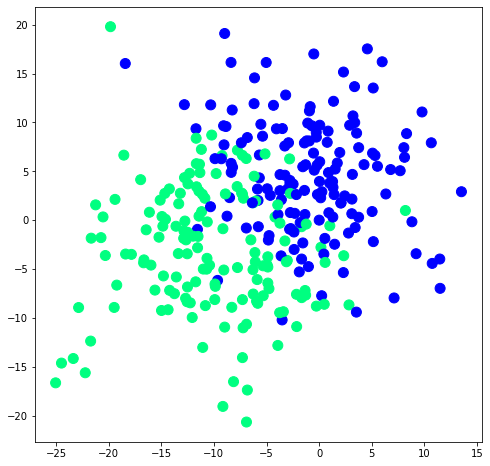

In [2]:
# генерация данных
data = datasets.make_blobs(300, centers=2, cluster_std=6, random_state=1)

pylab.figure(figsize=(8, 8))
pylab.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c = data[1], cmap = 'winter',
             s=100)

### Сравнение моделей

In [3]:
# Разбивание на треин и тест
train_data, test_data, train_labels, test_labels = train_test_split(data[0], 
                                                                    data[1], 
                                                                    test_size = 15,
                                                                    random_state = 1)

In [4]:
# Обучение и оценка линейного классификатора с нормой l2
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data, train_labels)

print(f'Roc-Auc RidgeClassifier: {metrics.roc_auc_score(test_labels, ridge_model.predict(test_data))}')

Roc-Auc RidgeClassifier: 0.8888888888888888


In [5]:
# Обучение и оценка линейного классификатора с оптимизационной функцией SGD
sgd_model = linear_model.SGDClassifier(random_state = 0)
sgd_model.fit(train_data, train_labels)

print(f'Roc-Auc SGDClassifier: {metrics.roc_auc_score(test_labels, sgd_model.predict(test_data))}')

Roc-Auc SGDClassifier: 0.7777777777777778


## Оценка среднего

In [6]:
# Результаты CV при оценке моделей по метрике Roc-Auc

sgd_auc_scores = cross_val_score(linear_model.SGDClassifier(), 
                                 data[0], data[1], scoring = 'roc_auc',  
                                 cv = 20)

ridge_auc_scores = cross_val_score(linear_model.RidgeClassifier(), 
                                 data[0], data[1], scoring = 'roc_auc',  
                                 cv = 20)

In [62]:
# Посмотрим результаты cv с метрикой roc_auc для SGD
sgd_auc_scores

array([1.        , 0.89285714, 0.94642857, 0.875     , 0.94642857,
       1.        , 0.69642857, 1.        , 0.91071429, 0.875     ,
       0.64285714, 0.92857143, 0.875     , 0.96428571, 0.98214286,
       1.        , 0.80357143, 1.        , 0.98214286, 0.89285714])

In [63]:
# Посмотрим результаты cv с метрикой roc_auc для RidgeClassifier
ridge_auc_scores

array([1.        , 0.89285714, 0.92857143, 0.89285714, 0.98214286,
       1.        , 0.73214286, 1.        , 0.92857143, 1.        ,
       0.85714286, 0.96428571, 0.91071429, 0.96428571, 0.98214286,
       1.        , 0.82142857, 0.98214286, 0.98214286, 0.91071429])

### Точечная оценка среднего

In [9]:
# Точечная оценка - оценка, выраженная одним значением.

print ("SGDClassifier roc-auc: mean %.3f, std %.3f" % (sgd_auc_scores.mean(), sgd_auc_scores.std(ddof=1)))
print ("RidgeClassifier roc-auc: mean %.3f, std %.3f" % (sgd_auc_scores.mean(), ridge_auc_scores.std(ddof=1)))

SGDClassifier roc-auc: mean 0.911, std 0.100
RidgeClassifier roc-auc: mean 0.911, std 0.071


### Интервальная оценка среднего

Существует 2 способа интервальной оценки: **z-интервал** и **t-интервал**.

**z-интервал** 

Используем при известной дисперсии $\sigma^2$ (не наш вариант):

$$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

**t-интервал**. 

Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [10]:
# Считаем  и квадрат длины выборок (в нашем случае выборка = результаты cv) 

sgd_mean_std = sgd_auc_scores.std(ddof=1)/np.sqrt(len(sgd_auc_scores))
ridge_mean_std = ridge_auc_scores.std(ddof=1)/np.sqrt(len(ridge_auc_scores))

# Посчитаем среднее по каждой выборке
sgd_mean = sgd_auc_scores.mean()
ridge_mean = sgd_auc_scores.mean()

In [22]:
# Подсчет доверительного интервала с помощью t-критерия
from statsmodels.stats.weightstats import _tconfint_generic

print ("SGDClassifier mean roc-auc 95%% доверительный интервал", np.round(_tconfint_generic(mean = sgd_mean,
                                                                                    std_mean = sgd_mean_std,
                                                                                    dof = len(sgd_auc_scores) - 1,
                                                                                    alpha = 0.05, 
                                                                                    alternative = 'two-sided'),3))

print ("RidgeClassifier mean roc-auc 95%% доверительный интервал", np.round(_tconfint_generic(mean = ridge_mean,
                                                                                      std_mean = ridge_mean_std,
                                                                                      dof = len(sgd_auc_scores) - 1,
                                                                                      alpha = 0.05,
                                                                                      alternative = 'two-sided'),3))

SGDClassifier mean roc-auc 95%% доверительный интервал [0.864 0.957]
RidgeClassifier mean roc-auc 95%% доверительный интервал [0.877 0.944]


------------------------------------------------------------------------------------------------------------------------------------

# Доверительные интервалы для доли

Доверительный интервал для доли - интервал для дискретных выборок. Например, для сравнения кликов, где 1- был клик, 0 - не было клика. Долей может быть среднее - 30/100 = 0.3 и т.д.

In [32]:
# Генерируем генеральную и выборочные бинарные данные 

np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000)  # генеральная совокупность

random_sample = np.random.choice(statistical_population, size = 1000) # исследуемая выборка
print(f'Пример выборки: {random_sample[:10]}...')
print(f'Истинное значение доли {statistical_population.mean()}')

Пример выборки: [1 1 1 0 1 0 0 1 0 0]...
Истинное значение доли 0.49771


### Точечная оценка доли

In [33]:
print(f'Точечная оценка доли {random_sample.mean()}')

Точечная оценка доли 0.502


### Доверительный интервал на основе нормального распределения

Доверительный интервал на основе нормального распределения работает по центральной предельной теореме

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

где $\hat{p}$ - отношение количества успеха к количеству всех событий,
(1 - $\hat{p}$) - отношения количества неудач к количеству всех событий

In [34]:
from statsmodels.stats.proportion import proportion_confint

In [35]:
normal_interval = proportion_confint(count=sum(random_sample),# количество успешных событий
                                     nobs=len(random_sample), # количство всего событий
                                     method = 'normal') # метод для оценки доверительного интервала

In [36]:
print ('Нормальный интервал: [%f, %f] с шириной %.3f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

Нормальный интервал: [0.471010, 0.532990] с шириной 0.062


### Доверительный интервал Уилсона

Является более точным методом для оценки интервала для доли:
$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [37]:
wilson_interval = proportion_confint(sum(random_sample), #количество успешных событий
                                     len(random_sample), #количество всех событий
                                     method = 'wilson') #название метода

In [38]:
print ('Интервал Уилсона [%f, %f] с шириной %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

Интервал Уилсона [0.471062, 0.532922] с шириной 0.061860


## Размер выборки для интервала заданной ширины

In [39]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [47]:
# Посчитаем какой выборки нужен для интервала с шириной 0.01х2 (0.1 от среднего в обе стороны)

n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 
                                                      0.01)))
n_samples

9604

In [48]:
# Возьмем выборку с данным объеймом из генеральной совокупности

np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [49]:
# Посчитаем нормальный интервал

normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')
print ('Нормальный интервал: [%f, %f] с шириной %.3f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

Нормальный интервал: [0.481776, 0.501773] с шириной 0.020


------------------------------------------------------------------------------------------------------------------------------------

# Доверительные интервалы на основе bootstrap

In [2]:
import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Время ремонта телекоммуникаций**

Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной 
части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования 
не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована. 

In [4]:
data = pd.read_csv('verizon.txt', sep='\t')
print(data.shape)

data.head()

(1687, 2)


,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [7]:
# Видим, что выборка несбалансирована. Количество наблюдений в группах сильно разнится

data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

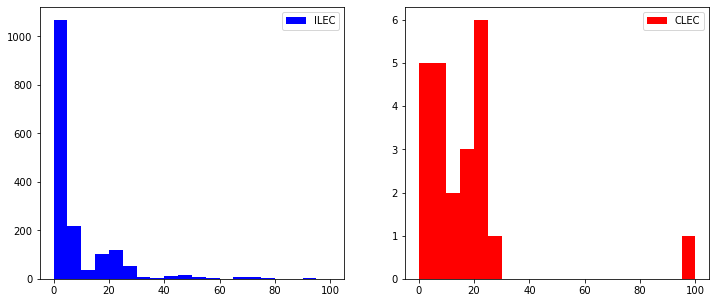

In [9]:
# Посмотрим распределение данных по группам

pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data[data.Group == 'ILEC'].Time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data.Group == 'CLEC'].Time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend()

pylab.show()

## Bootstrap

In [14]:
def get_bootstrap_samples(data, n_samples):
    
    """
    Данный метод берет рандомно сэмпл из данных с возвращением
    
    data - выборка
    n_samples -  количество подвыборок размера len(data)
    
    Возвращает матрицу n_samples x len(data).
    Т.е количество подвыборок размера исходного размера.  
    """
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [39]:
def stat_intervals(stat, alpha):
    """
    Данный метод считает границы интервала на основе перцентилей
    
    stats - выборка для подсчета границ
    alpha - уровень значимости (т.е погрешность)
    
    Возвращает границы интервала по перцентилям (например для alpha 0.05 - [2.5, 97.])
    """
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Интервальная оценка медианы

In [40]:
# Разделим выборку на подвыборки каждой группы формата np.array

ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [41]:
np.random.seed(0)

# Найдем для каждой подвыборки bootstrap их медианы для каждой группы 
ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 1000)))

print("95% доверительный интервал для ILEC медианы времени ремонта:",  stat_intervals(ilec_median_scores, 0.05))
print("95% доверительный интервал для CLEC медианы времени ремонта:",  stat_intervals(clec_median_scores, 0.05))

95% доверительный интервал для ILEC медианы времени ремонта: [3.18    3.82525]
95% доверительный интервал для CLEC медианы времени ремонта: [ 5.79125 20.     ]


#### Точечно оценим разность медиан

In [45]:
# точечно оценим разность медиан
print ("Разница медиан:", np.median(clec_time) - np.median(ilec_time))

Разница медиан: 10.74


#### Оценим интервально разность медиан

Мы не можем посчитать границы медиан 2-ух выборок и потом вычесть их (левая - левая, правая - правая), для этого нет никакого теоретического обоснования. В таком случае стоит посчитать разность медиан, далее оценить границы получившигося массива.

In [55]:
# получаем разность медиан двух выборок 
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores)))

# Считаем доверительный интервал медиан по перцинтилям
print ("95% доверительный интервалл для разницы медиан ",  stat_intervals(delta_median_scores, 0.05))

95% доверительный интервалл для разницы медиан  [ 2.04975 16.63   ]


Видно, что медианы отличаются (левая граница > 0), следовательно компания завышает время ремонта для группы clec и должна быть оштрафована.

------------------------------------------------------------------------------------------------------------------------------------

# Критерий согласия Пирсона ( $\chi^2$)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Исчерпанная рождаемость

Исчерпанная рождаемость — количество детей, родившихся у женщины на момент окончания конвенционального репродуктивного возраста (45 лет). Для 1878 женщин старше 45, участвовавших в социологическом опросе жителей Швейцарии, известно количество детей. Этот признак — типичный счётчик, а, значит, его можно попробовать описать распределением Пуассона.

* **выборка** - целочисленный вектор длиы $n$, характеризующий количество детей у опрашиваемой женщины
* **гипотеза $H_0$** - рассматриваемая величина имеет распределение Пуассона

In [10]:
# Загружаем данные

fin = open('fertility.txt', 'r')
data = list(map(lambda x: int(x.strip()), fin.readlines()))

data[:20]

[0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 3, 2, 2, 4]

Среднее по выборке: 1.93716719914803


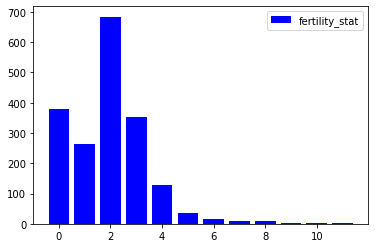

In [29]:
# Визуализируем полученные частоты

pylab.bar(range(12), np.bincount(data), color = 'b', label = 'fertility_stat')
pylab.legend()

print(f'Среднее по выборке: {np.mean(data)}')

## Критерий согласия

In [13]:
# Посчитаем частоты каждого уникального значения

observed_frequences = np.bincount(data)
observed_frequences

array([379, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1])

In [27]:
# Посчитаем ожидаемые частоты по распределению Пуассона 
# С помощью stats.poisson.pmf мы получаем плотность пуассоновского распределения с центром в data.mean

expected_frequences = [len(data)*stats.poisson.pmf(x, np.mean(data)) for x in range(min(data), max(data) + 1)]
expected_frequences

[270.6416065637888,
 524.2780429600978,
 507.80711402791167,
 327.9024282629646,
 158.80045713800124,
 61.52460735548975,
 19.863908551586047,
 5.49710172757265,
 1.3311006446292126,
 0.28650716750450117,
 0.055501228721053016,
 0.009774105435530582]

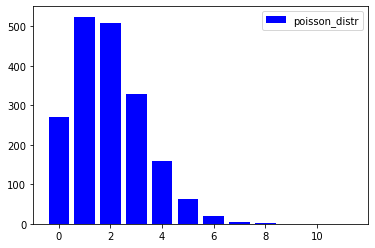

In [28]:
# Визуализируем ожидаемые частоты

pylab.bar(range(len(expected_frequences)), expected_frequences, color = 'b', label = 'poisson_distr')
pylab.legend()

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
При справедливости нулевой гипотезы имеет распределение хи-квадрат с числом степеней свободы $K-1-m$, где $m$ - число параметров распределения, оцененных по выборке.

In [50]:
t_stat,  p_value = stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

print(f'Получаемая статистика {t_stat} и p_value: {p_value}')

Получаемая статистика 431.5752205284916 и p_value: 1.772613180233512e-86


Мы можем отвергнуть нулевую гипотезу при данном уровне значимости (<0.05). Данное распределение не имеет распределение Пуассона.

--------------------------------------------------------------------------------------------------------------------

# Критерий Стюдента

In [2]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест. Чем выше показатели, тем лучше.

Требуется оценить эффект применения препарата.

In [3]:
# Загружаем данные 
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

data.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


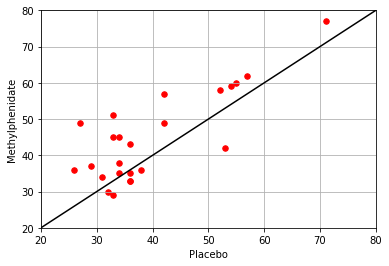

In [4]:
# Визуализиурем scatter_plot и посмотрим относительно диагонали (изменений нет)
# Видно, что точки лежат выше, что говорит о том, что в большинстве случаев при препарате результаты лучше
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

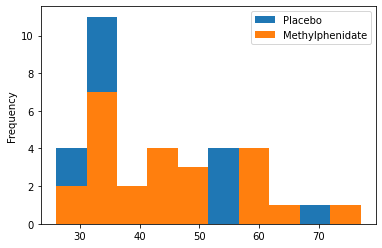

In [5]:
# Совместное распределение 

data.plot.hist()
pylab.show()

## Одновыборочный критерий Стьюдента

Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). 

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.

$H_1\colon$ не равно.

In [6]:
# Видим, что p значение меньше 0.05, соответственно отвергаем H0 
stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

In [7]:
# 50 не входит в 95% доверительный интервал 
print ("95%% доверительный интервал: [%f, %f]" % zconfint(data.Placebo))

95% доверительный интервал: [35.223273, 44.276727]


## Двухвыборочный критерий Стьюдента (независимые выборки)

Двухвыборочный критерий, как и следует из назавния, используется для сравнения двух выборок. 

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

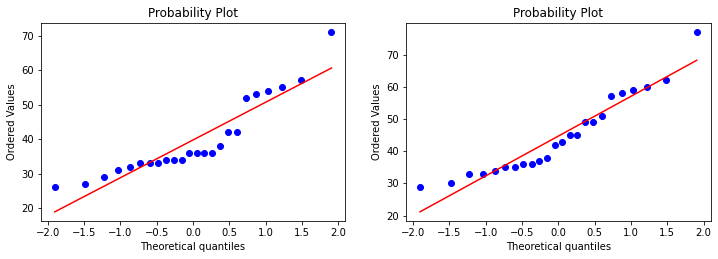

In [8]:
# Проверим это на графиках Q-Q плот
# Видим, что данные отличаеются от на прямой, но не существенно

pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

Для того, чтобы строго проверить нормальность распределения используется критерий Шапиро-Уилка.


**Критерий Шапиро-Уилка:**

$H_0\colon$ способности к подавлению импульсивных реакций распределены нормально.

$H_1\colon$ не нормально.

In [9]:
# Для использования критерия Шапиро-Уилка используется метод scipy.stats.shapiro
# Получили p значение < 0.05, соответственно нулевая гипотеза отвергается.

print ("Shapiro-Wilk тест на нормальность, W-statistic: %f, p-value: %f"\
       % stats.shapiro(data.Methylphenidate))

Shapiro-Wilk тест на нормальность, W-statistic: 0.916445, p-value: 0.048768


In [10]:
# Для использования критерия Шапиро-Уилка используется метод scipy.stats.shapiro
# Получили p значение < 0.05, соответственно нулевая гипотеза отвергается.

print ("Shapiro-Wilk тест на нормальность, W-statistic: %f, p-value: %f"\
       % stats.shapiro(data.Placebo))

Shapiro-Wilk тест на нормальность, W-statistic: 0.857487, p-value: 0.003020


С помощью критерия Стьюдента проверим гипотезу о развенстве средних двух выборок. Критерий стьюдента работает, когда распределение не является нормальным, но существенно от него не отличается

**Критерий Стьюдента:**

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [11]:
# Для использования двухвыборочного критерия Стьюдента для независимых выборок используется scipy.stats.ttest_ind*
# *ind - independent (независимый)
# p-значение > 0.05, соотвественно H0 не может быть отвергнута

scipy.stats.ttest_ind(data.Placebo, # выборка_1
                      data.Methylphenidate, # выборка_2
                      equal_var = False) # Неизвестно о равенстве дисперсий в генеральных

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

In [53]:
# Оценим разность средних по этим двум выборкам (CompareMeans). DescrStatsW - обертка для стат. показателей.
# Несмотря на то, что интервал сильно перекошен вправо, относительно 0
# 0 все таки входит входит в этот интервал, поэтому однозначно сказать мы не можем.

cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print ("95%% доверительый интервал: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% доверительый интервал: [-1.915927, 11.832593]


## Двухвыборочный критерий Стьюдента (зависмые выборки)


На самом деле, выборки явлются зависимыми, по той причине, что они используются на одних и тех же пациентах последовательно.

Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

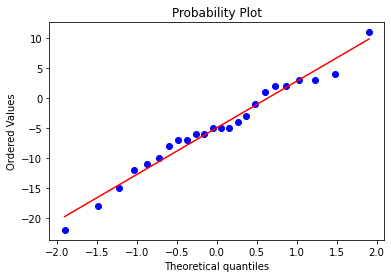

In [36]:
# Точки довольно близко распределенны вокруг прямой

stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

Проверим строго с помощью статистического критерия.

**Критерий Шапиро-Уилка:**

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [27]:
# Для использования критерия Шапиро-Уилка используется метод scipy.stats.shapiro
# На вход методу подается разность двух выборок
# Получили p значение > 0.05, соответственно мы не можем отвергнуть нулевую гипотезу.

print ("Shapiro-Wilk тест на нормальность, W-statistic: %f, p-value: %f"\
       % stats.shapiro(data.Methylphenidate - data.Placebo))

Shapiro-Wilk тест на нормальность, W-statistic: 0.979806, p-value: 0.892254


Так как распределение прошло проверку на нормальность, мы можем использовать критерий Стьюдента.

**Критерий Стьюдента:**

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [39]:
# rel- relative (зависимый)
# Получили p значение < 0.05, соответственно нулевая гипотеза отвергается.

stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [52]:
# Видим, что 0 не входит в 95% доверительый интервал и имеет положительные значения.

print ("95%% доверительный интервал: [%1.3f, %1.3f]" % \
       DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean())

95% доверительный интервал: [1.775, 8.141]


Можем сделать вывод, что препарат улучшает показатели.

------------------------------------------------------------------------------------------------------------------------------------

# Z-критерий для двух долей 

In [21]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

В этот раз данными являются лайки одних и тех же людей на понравившийся баннер.


Цель: определить, какой из баннеров будет предпочительнее 

In [22]:
# Загрузка данных

data = pd.read_csv('banner_click_stat.txt', header = None, sep = '\t')
data.columns = ['banner_a', 'banner_b']
data.head()

,banner_a,banner_b
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [23]:
# Посмотрим базовые статистики

data.describe()

,banner_a,banner_b
count,1000.000000,1000.000000
mean,0.037000,0.053000
std,0.188856,0.224146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


## Интервальные оценки долей

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [24]:
# Посчитаем доверительные интервалы с помощью метода Уилсона для баннера а и b.

conf_interval_banner_a = proportion_confint(sum(data.banner_a), # Количество успешных событий (1)
                                            data.shape[0],      # Количество всего событий (1 и 0)
                                            method = 'wilson')  # Название метода

conf_interval_banner_b = proportion_confint(sum(data.banner_b), 
                                            data.shape[0],
                                            method = 'wilson')

In [25]:
# Мы получаем интервалы, которые пересекаются между собой
# Соответственно мы не можем сказать, какой из баннеров предпочтительнее пользователям

print ('95%% доверительный интервал для вероятности клика по баннеру а: [%f, %f]' % conf_interval_banner_a)
print ('95%% доверительный интервал для вероятности клика по баннеру b: [%f, %f]' % conf_interval_banner_b)

95% доверительный интервал для вероятности клика по баннеру а: [0.026961, 0.050582]
95% доверительный интервал для вероятности клика по баннеру b: [0.040747, 0.068675]


## Z-критерий для разности долей (независимые выборки)




                                                      x1  |  x2
                                                    |-----------
                                                1   |  a  |  b
                                                0   |  c  |  d
                                                sum |  n1 |  n2
                                                
                                                
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$


$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$


$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$


In [26]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):

    """
    Метод считает доверительный интервал для долей по независимым выборкам 
    
    На вход:
        sample1 - выборка 1
        sample2 - выборка 2
        alpha - уровень доверия
        
    На выходе:
        Левая и правая граница доверительного интервала
    """
    
    # статистика для alpha уровня значимости в нормальном стандартизированном (Z) распределении 
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    # Доля успеха для первой выборки 
    p1 = float(sum(sample1)) / len(sample1)
    
    # Доля успеха для второй выборки
    p2 = float(sum(sample2)) / len(sample2)
    
    # По формуле выше вычисляем доверительный интервал для разности
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [27]:
def proportions_diff_z_stat_ind(sample1, sample2):
    """
    Метод считает Z-статистику из формулы выше
    
    На вход:
        sample1 - выборка 1
        sample2 - выборка 2
         
    На выходе:
        Z-статистика
    
    """
    
    # Количество первой и второй выборок
    n1 = len(sample1)
    n2 = len(sample2)
    
    # Количество успехов в каждой из выборок и рассчет P
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    # Z статистика для разницы долей
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [28]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    
    """
     Функция для рассчета p_value
    
    На вход:
        z_stat - z статистика, которую мы будем оценивать
        alternative - альтернатива, против который мы будем тестировать H0 (меньше, больше, )
    """
    
    # Проверка на правильность ввода alternative проверки
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    # Расчет p_value исходя из соответствующей альтернативы 
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [32]:
# Так как 0 входит в интервал, мы не можем сказать однозначно

print ("95%% доверительный интервал для разности долей: [%f, %f]" %\
      proportions_diff_confint_ind(data.banner_a, data.banner_b))

95% доверительный интервал для разности долей: [-0.034157, 0.002157]


In [34]:
# На уровне значимости 0.05, мы не можем отвергнуть гипотезу, однако можем на уровне 0.1 

print ("p-value при двусторонней альтернативе: %f" %\
       proportions_diff_z_test(proportions_diff_z_stat_ind(data.banner_a, data.banner_b)))

p-value при двусторонней альтернативе: 0.084379


In [35]:
# Используя априорное предположение, что новый баннер лучше, протестируем против альтернативы "less"
# При уровне значимости 0.05 мы можем отвергнуть H0

print( "p-value при односторонней альтернативе (меньше): %f" %\
      proportions_diff_z_test(proportions_diff_z_stat_ind(data.banner_a, data.banner_b), 'less'))

p-value при односторонней альтернативе (меньше): 0.042189


## Z-критерий для разности долей (связанные выборки)

Так как новые выборки расценивали одни и те же люди, данные выборки являются связанными. Для этого используем другой метод оценки двух долей.

    Воспользуемся таблицей сопряженности:


                                               x1\x2|  1  |  0  |  sum
                                                ----|------------------
                                                1   |  e  |  f  | e+f
                                                0   |  g  |  h  | g+h
                                                sum | e+g | f+h |  n


  
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

$$Z-статистика: Z({X_1, X_2}) = \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$$

In [43]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    
    """
    Метод считает доверительный интервал для долей по связанным выборкам 
    
    На вход:
        sample1 - выборка 1
        sample2 - выборка 2
        alpha - уровень доверия
        
    На выходе:
        Левая и правая граница доверительного интервала
    """
    
    # статистика для alpha уровня значимости в нормальном стандартизированном (Z) распределении  
    z = scipy.stats.norm.ppf(1 - alpha / 2.)

    sample = list(zip(sample1, sample2))
    n = len(sample)
            
    # Рассчитываем исходя из формулы выше
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [44]:
def proportions_diff_z_stat_rel(sample1, sample2):
    
    """
    Метод считает Z-статистику из формулы выше
    
    На вход:
        sample1 - выборка 1
        sample2 - выборка 2
         
    На выходе:
        Z-статистика
    
    """
    
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [58]:
# Так как доверительный интервал левее 0, мы можем сказать, что новый баннер лучше старого

print ("95%% доверительный интервал для разницы между долями: [%f, %f]" 
      % proportions_diff_confint_rel(data.banner_a, data.banner_b))

95% доверительный интервал для разницы между долями: [-0.026689, -0.005311]


In [59]:
# При данном p_value мы можем уверенно отвергнуть нулевую гипотезу, что доли одинаковы

print ("p-value при двусторонней альтернативе: %f"
       % proportions_diff_z_test(proportions_diff_z_stat_rel(data.banner_a, data.banner_b)))

p-value при двусторонней альтернативе: 0.003349


In [67]:
# Мы получили еще меньше p_value

print ("p-value при односторонней альтернативе" % 
proportions_diff_z_test(proportions_diff_z_stat_rel(data.banner_a, data.banner_b), 'less'))

p-value при односторонней альтернативе


------------------------------------------------------------------------------------------------------------------------

# Биномиальный критерий для доли

In [6]:
import numpy as np
from scipy import stats


import scipy
print(np.__version__)
print(scipy.__version__)

%pylab inline

1.19.2
1.1.0
Populating the interactive namespace from numpy and matplotlib


### Shaken, not stirred (синтетический пример)

Джеймс Бонд говорит, что предпочитает мартини взболтанным, но не смешанным. Проведём слепой тест (blind test): $n$ раз предложим ему пару напитков и выясним, какой из двух он предпочитает. Получаем: 

* **выборка:** бинарный вектор длины $n$, где 1 — Джеймс Бонд предпочел взболтанный напиток, 0 — смешанный;
* **гипотеза $H_0$:** Джеймс Бонд не различает 2 вида напитков и выбирает наугад;
* **статистика $T$:** количество единиц в выборке.
    
Если нулевая гипотеза справедлива и Джеймс Бонд действительно выбирает наугад, то мы можем с одинаковой вероятностью получить любой из $2^n$ бинарных векторов длины $n$. 

Мы могли бы перебрать все такие векторы, посчитать на каждом значение статистики $T$ и получить таким образом её нулевое распределение. Но в данном случае этот этап можно пропустить: мы имеем дело с выборкой, состоящей из 0 и 1, то есть, из распределения Бернулли $Ber(p)$. Нулевая гипотеза выбора наугад соответствует значению $p=\frac1{2}$, то есть, в каждом эксперименте вероятность выбора взболтанного мартини равна $\frac1{2}$. Сумма $n$ одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(n, p)$. Следовательно, нулевое распределение статистики $T$ — $Bin\left(n, \frac1{2}\right)$.

Пусть $n=16.$

In [8]:
# Создам объект биномиального распределения с параметреми 16 испатаний с вероятностью 0.5, гипотеза H0

n = 16
F_H0 = stats.binom(n, 0.5)

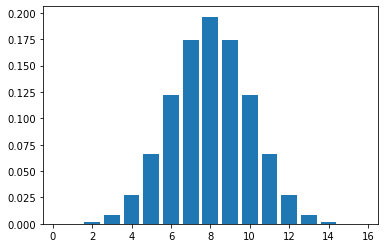

In [10]:
# Визуализируем получившееся биномальное распределение 

x = np.linspace(0,16,17)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(-0.5, 16.5) 
pylab.show()

## Односторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает взболтанный мартини.

При такой альтернативе более вероятны большие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом хвосте распределения.

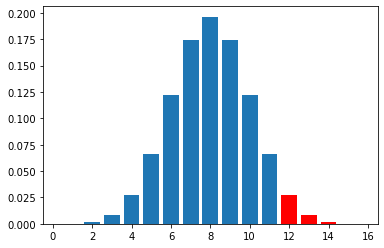

Уровень значимости при данной альтернивной гипотизе: 0.0384063720703125


In [34]:
# Красным выделена область с уровнем значимости 0.038

pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

print('Уровень значимости при данной альтернивной гипотизе:',
      stats.binom_test(12, 16, 0.5, alternative = 'greater'))

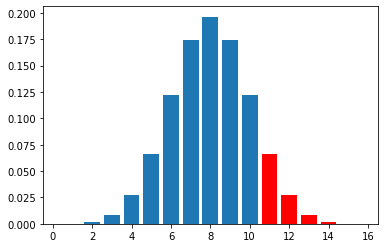

Уровень значимости при данной альтернивной гипотизе: 0.10505676269531246


In [33]:
# Красным выделена область с уровнем значимости 0.105

pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(11,16,6), F_H0.pmf(np.linspace(11,16,6)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

print('Уровень значимости при данной альтернивной гипотизе:',
        stats.binom_test(11, 16, 0.5, alternative = 'greater'))

## Двусторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает какой-то определённый вид мартини.

При такой альтернативе более вероятны очень большие и очень маленькие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом и левом хвостах распределения.

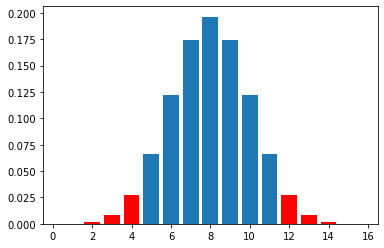

Уровень значимости при данной двусторонней гипотизе: 0.076812744140625


In [32]:
# Красным выделена область при уровне значимости 0.077

pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
pylab.bar(np.linspace(0,4,5), F_H0.pmf(np.linspace(0,4,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

print('Уровень значимости при данной двусторонней гипотизе:',
        stats.binom_test(12, 16, 0.5, alternative = 'two-sided'))

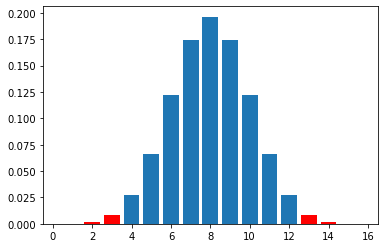

Уровень значимости при данной двусторонней гипотизе: 0.021270751953125


In [31]:
# Красным выделена область при уровне значимости 0.077

pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(13,16,4), F_H0.pmf(np.linspace(13,16,4)), align = 'center', color='red')
pylab.bar(np.linspace(0,3,4), F_H0.pmf(np.linspace(0,3,4)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

print('Уровень значимости при данной двусторонней гипотизе:',
stats.binom_test(13, 16, 0.5, alternative = 'two-sided'))

------------------------------------------------------------------------------------------------------------

# Непараметрические критерии

    Критерий       | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
    ---------------|----------------|----------------|------------------------------------
    Знаков         |       X        |                |
    Ранговый       |       X        |        X       |          X  
    Перестановочный|       X        |        X       |          X

## Mirrors as potential environmental enrichment for individually housed laboratory mice

(Sherwin, 2004): 16 лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

In [2]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
# Загрузка данных

mouses_data = pd.read_csv('mirror_mouses.txt', header = None)
mouses_data.columns = ['proportion_of_time']
mouses_data

,proportion_of_time
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444
5,0.426292
6,0.417156
7,0.477977
8,0.450657
9,0.476602


In [6]:
# Базовые статистики

mouses_data.describe()

,proportion_of_time
count,16.000000
mean,0.475289
std,0.066065
min,0.348471
25%,0.444566
50%,0.477289
75%,0.488859
max,0.640620


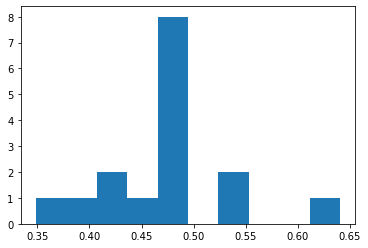

In [7]:
pylab.hist(mouses_data.proportion_of_time)
pylab.show()

## Одновыборочные критерии

In [10]:
print ('95%% доверительный интервал для среднего времени: [%f, %f]' % zconfint(mouses_data))

95% доверительный интервал для среднего времени: [0.442918, 0.507660]


### Критерий знаков

$H_0\colon$ медиана доли времени, проведенного в клетке с зеркалом, равна 0.5

$H_1\colon$ медиана доли времени, проведенного в клетке с зеркалом, не равна 0.5

In [12]:
# На уровне значимости 0.05 мы можем отвергнуть нулевую гипотезу

print ("M: %d, p-value: %f" % sign_test(mouses_data, 0.5))

M: -5, p-value: 0.021271


### Критерий знаковых рангов Вилкоксона

In [15]:
# На уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу

m0 = 0.5
stats.wilcoxon(mouses_data.proportion_of_time - m0)

WilcoxonResult(statistic=35.0, pvalue=0.08793560714236243)

### Перестановочный критерий

$H_0\colon$ среднее равно 0.5

$H_1\colon$ среднее не равно 0.5

In [19]:
def permutation_t_stat_1sample(sample, mean):
    
    """
    Метод считает t статистику (вычитает из выборки среднее и сумирует получившиеся значения)
    """
    
    t_stat = sum(list(map(lambda x: x - mean, sample)))
    return t_stat

In [20]:
permutation_t_stat_1sample(mouses_data.proportion_of_time, 0.5)

-0.3953776999999997

In [22]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    
    """
    Формирует распределение нулевой гиптезы с помощью перестановки критерий
    """
    
    # центрирование выборки
    centered_sample = list(map(lambda x: x - mean, sample))
    
    # ограчичим по перестановкам
    if max_permutations:
        
        # получаем множество из (0 и -1) в размере max_permutations х len(sample) 
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        
        # itertools.product(A, B) returns the same as:  ((x,y) for x in A for y in B)
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    
    # Умножает центрированную выборку на массив знаков и суммирует их     
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

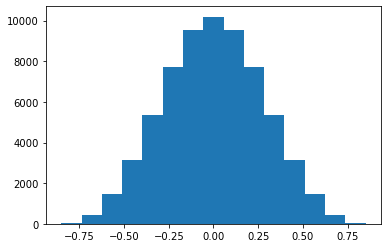

In [23]:
# Построим распределение нулевой гипотезы

pylab.hist(permutation_zero_distr_1sample(mouses_data.proportion_of_time, 0.5), bins = 15)
pylab.show()

In [25]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    
    """
    Считает p_value для перестановочного критерия
    """
    
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    # t статистика
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    # генерация нулевого распределения 
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [26]:
# На уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу

print ("p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5))

p-value: 0.157776


In [27]:
# Уточним результат, используется 10 тыс. перестановок

print ("p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5, 10000))

p-value: 0.156189


-------------------------------------------------------------------------------------------------------------------

# Непараметрические критерии

    Критерий       | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
    ---------------|----------------|----------------|------------------------------------
    Знаков         |       X        |                |
    Ранговый       |       X        |        X       |          X  
    Перестановочный|       X        |        X       |          X

## Терапия при анорексии

В исследовании оценивается эффективность поведенческой терапии для лечения анорексии. Для 50 пациентов известен вес до начала терапии и по её окончании. Была ли терапия эффективной?

In [2]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# загружаем данные по весам
weight_data = pd.read_csv('weight.txt', sep = '\t', header = 0)
weight_data.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


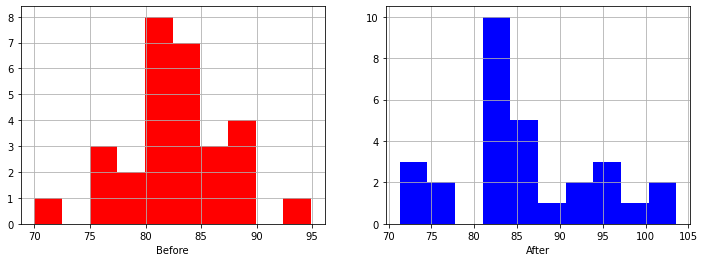

In [5]:
# Видим, что вес после теропии стал больше. Но значимо ли это статистически?

pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(weight_data.Before, color = 'r')
pylab.xlabel('Before')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(weight_data.After, color = 'b')
pylab.xlabel('After')

pylab.show()

In [6]:
# Базовые статистики

weight_data.describe()

,Before,After
count,29.000000,29.000000
mean,82.689655,85.696552
std,4.845495,8.351924
min,70.000000,71.300000
25%,80.400000,81.900000
50%,82.600000,83.900000
75%,85.000000,90.900000
max,94.900000,103.600000


## Двухвыборочные критерии для связных выборок

$H_0\colon$ медианы веса до и после терапии совпадает

$H_1\colon$ медианы веса до и после тепрапии отличаются

In [11]:
# Посмотреть доверительный интервал по z-статистике

print ('95%% доверительный интервал для среднего до терапии: [%f, %f]'\
       % zconfint(weight_data.Before))

95% доверительный интервал для среднего до терапии: [80.926107, 84.453203]


In [14]:
# Видим, что интервалы пересекаются

print ('95%% доверительный интервал для среднего после терапии: [%f, %f]'\
       % zconfint(weight_data.After))

95% доверительный интервал для среднего после терапии: [82.656817, 88.736286]


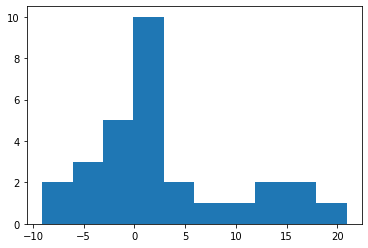

In [15]:
# Распределение разницы весов

pylab.hist(weight_data.After - weight_data.Before)
pylab.show()

### Критерий знаков

Эти критерии обладают невысокой мощностью, но они крайне универсальны и практически ничего не требуют от данных, поэтому они очень полезны на практике.

Критерий знаков смотрит только на знаки, не на абсолютные значения

$H_0\colon P\left(X_1>X_2\right)=\frac1{2},$

$H_1\colon P\left(X_1>X_2\right)\neq\frac1{2}$

In [17]:
# M = (N(+) - N(-))/2
# Мы не можем отвергнуть нулевую гипотезы

print ("M: %d, p-value: %f" % sign_test(weight_data.After - weight_data.Before))

M: 3, p-value: 0.264931


### Критерий знаковых рангов Уилкоксона

При использовании ранговых критериев выборки превращают в ранги, затем делается какое-то дополнительное предположение, и на основании этого предположения получается, что разные конфигурации этих рангов при справедливости нулевой гипотезы могут реализоваться с равной вероятностью. Далее необходимо перебрать все конфигурации, и на каждой посчитать значение статистики — таким образом оценивается ее нулевое распределение.

$H_0\colon med\left(X_1-X_2\right)=0,$

$H_1\colon med\left(X_1-X_2\right)\neq0$

In [27]:
# На уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу

stats.wilcoxon(weight_data.After, weight_data.Before)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

In [29]:
# Аналогично для разницы

stats.wilcoxon(weight_data.After - weight_data.Before)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

### Перестановочный критерий

При использовании ранговых критериев выборки превращают в ранги, затем делается какое-то дополнительное предположение, и на основании этого предположения получается, что разные конфигурации этих рангов при справедливости нулевой гипотезы могут реализоваться с равной вероятностью. Далее необходимо перебрать все конфигурации, и на каждой посчитать значение статистики — таким образом оценивается ее нулевое распределение.

Если в этом алгоритме пропустить первый пункт (не превращать наблюдения в ранги), а остальное делать точно так же, то получится алгоритм работы перестановочных критериев.

$H_0\colon \mathbb{E}(X_1 - X_2) = 0$

$H_1\colon \mathbb{E}(X_1 - X_2) \neq 0$

In [59]:
def permutation_t_stat_1sample(sample, mean):
    """
    Метод считает t статистику (вычитает из выборки среднее и сумирует получившиеся значения)
    """
    t_stat = sum(list(map(lambda x: x - mean, sample)))
    return t_stat

In [54]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    
    """
    Формирует распределение нулевой гиптезы с помощью перестановки критерий
    """
    # центрирование выборки
    centered_sample = list(map(lambda x: x - mean, sample))
    
    # ограчичим по перестановкам
    if max_permutations:
        
        # получаем множество из (0 и -1) в размере max_permutations х len(sample) 
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        
        # itertools.product(A, B) returns the same as:  ((x,y) for x in A for y in B)
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    
    # Умножает центрированную выборку на массив знаков и суммирует их     
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

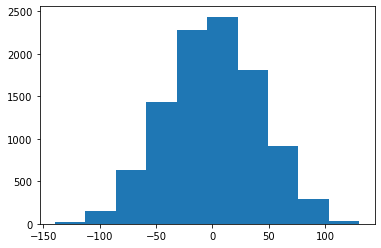

In [55]:
# Видим, что нулевая гипотеза имеет около нормальное распределение в центре 0

pylab.hist(permutation_zero_distr_1sample(weight_data.After - weight_data.Before, 0., 
                               max_permutations = 10000))
pylab.show()

In [60]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    
    """
    Считает p_value для перестановочного критерия
    """
    
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    # t статистика
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    # генерация нулевого распределения 
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [61]:
# На уровне значимости 0.05 можем отвергнуть нулевую гипотезу

print ("p-value: %f" % permutation_test(weight_data.After - weight_data.Before, 0., 
                               max_permutations = 1000))

p-value: 0.030000


In [63]:
# На уровне значимости 0.05 можем отвергнуть нулевую гипотезу

print ("p-value: %f" % permutation_test(weight_data.After - weight_data.Before, 0., 
                               max_permutations = 50000))

p-value: 0.034383


Оценка среднего:

    Критерий знаков - медиана, в качестве информации используте только знаки;
    Перестановочный критерий - мат. ожидание разности выборок, использует значения;
    Ранговый - медиана, в качестве информации использует порядок.

------------------------------------------------------------------------------------------

# Непараметрические криетрии





    Критерий       | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
    ---------------|----------------|----------------|------------------------------------
    Знаков         |       X        |                |
    Ранговый       |       X        |        X       |          X  
    Перестановочный|       X        |        X       |          X

## Недвижимость в Сиэттле

Имеются данные о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002. Изменились ли в среднем цены?

In [31]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
# Загрузка данных

seattle_data = pd.read_csv('seattle.txt', sep = '\t', header = 0)
seattle_data.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [36]:
# Разделим цены

price2001 = seattle_data[seattle_data['Year']  == 2001].Price
price2002 = seattle_data[seattle_data['Year']  == 2002].Price

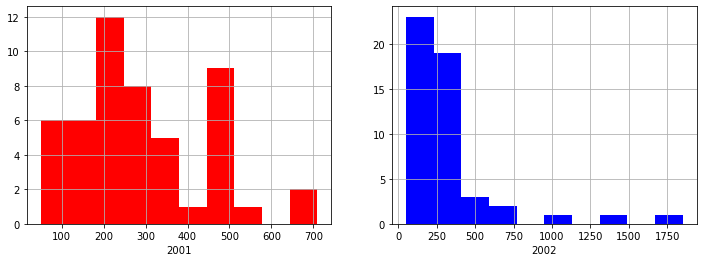

In [39]:
# Визуально мы видим, что цены за 2002 год расположены правее

pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(price2001, color = 'r')
pylab.xlabel('2001')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(price2002, color = 'b')
pylab.xlabel('2002')

pylab.show()

## Двухвыборочные критерии для независимых выборок

In [41]:
print ('95%% доверительный интервал для среднего за 2001 год: [%f, %f]' % zconfint(price2001))

95% доверительный интервал для среднего за 2001 год: [245.193581, 332.659499]


In [44]:
# Видим, что интервалы средних пересекаются

print ('95%% доверительный интервал для среднего за 2002: [%f, %f]' % zconfint(price2002))

95% доверительный интервал для среднего за 2002: [241.437946, 417.076334]


### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [46]:
# p значимость не ниже уровня значимости 0.05, соответственно мы не можем отмести равенство средних

stats.mannwhitneyu(price2001, price2002)

MannwhitneyuResult(statistic=1204.5, pvalue=0.3781936337850874)

### Перестановочный критерий

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [69]:
def permutation_t_stat_ind(sample1, sample2):
    """
    Рассчитывает разницу средних
    """
    return np.mean(sample1) - np.mean(sample2)



def get_random_combinations(n1, n2, max_combinations):
    """
    Выдает случайные подвыборки 
    """
    # последовательность длинной двух выборок
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    
    # получаем случайные выборки количества max_combinations
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]


def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    
    """
    Выдает распределение нулевой гипотезы у перестановочного критерия
    """
    
    #объединяем 2 выборки
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    #создаем случайные подвыборки
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
        
    #перестановки индексов, например: ([0, 1, 3, 5], [2, 4, 6, 7, 8, 9])
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, range(n)))) \
                    for index in itertools.combinations(range(n), n1)]
    
    # Считаем разности средних по 2 случайным подвыборкам
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

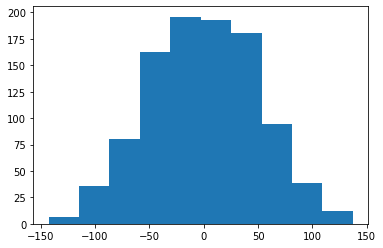

In [70]:
pylab.hist(permutation_zero_dist_ind(price2001, price2002, max_combinations = 1000))
pylab.show()

In [71]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    
    """
    Считает p_value для перестановочного критерия
    """
    
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    # t статистика
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    # генерация нулевого распределения 
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [72]:
# Перестановочнйы критерий не позволяет отвергнуть нулевую гипотезу

print ("p-value: %f" % permutation_test(price2001, price2002, max_permutations = 10000))

p-value: 0.405900


In [74]:
# При увеличении итераций значительно ничего не поменялось
# На текущих данных мы не можем утверждать, что цены координально изменились

print ("p-value: %f" % permutation_test(price2001, price2002, max_permutations = 50000))

p-value: 0.404560


------------------------------------------------------------------------------------------